In [1]:
%matplotlib inline
import pandas as pd
import uproot
import awkward
import matplotlib.pyplot as plt
import numpy as np
import math
import glob
import numba
from matplotlib.colors import LogNorm
import uproot_methods
from tqdm.auto import tqdm

from utils import set_plotting_style, get_chunking, get_chunking_dask


try:
    from yahist import Hist1D, Hist2D
except:
    !pip install git+git://github.com/aminnj/yahist.git#egg=yahist -U
    from yahist import Hist1D, Hist2D

In [12]:
from dask import delayed
from dask.distributed import Client
client = Client("uaf-10.t2.ucsd.edu:50123")
client

Client Scheduler: tcp://uaf-10.t2.ucsd.edu:50123 Dashboard: http://uaf-10.t2.ucsd.edu:8787/status,Cluster Workers: 13 Cores: 13 Memory: 65.00 GB


In [3]:
set_plotting_style()

In [4]:
df_data = pd.read_pickle("data/df_data.pkl")
df_mc = pd.read_pickle("data/df_mc.pkl")

Text(0.5, 1.0, '3d angle between mu1 and mu2 for mass>10GeV in data')

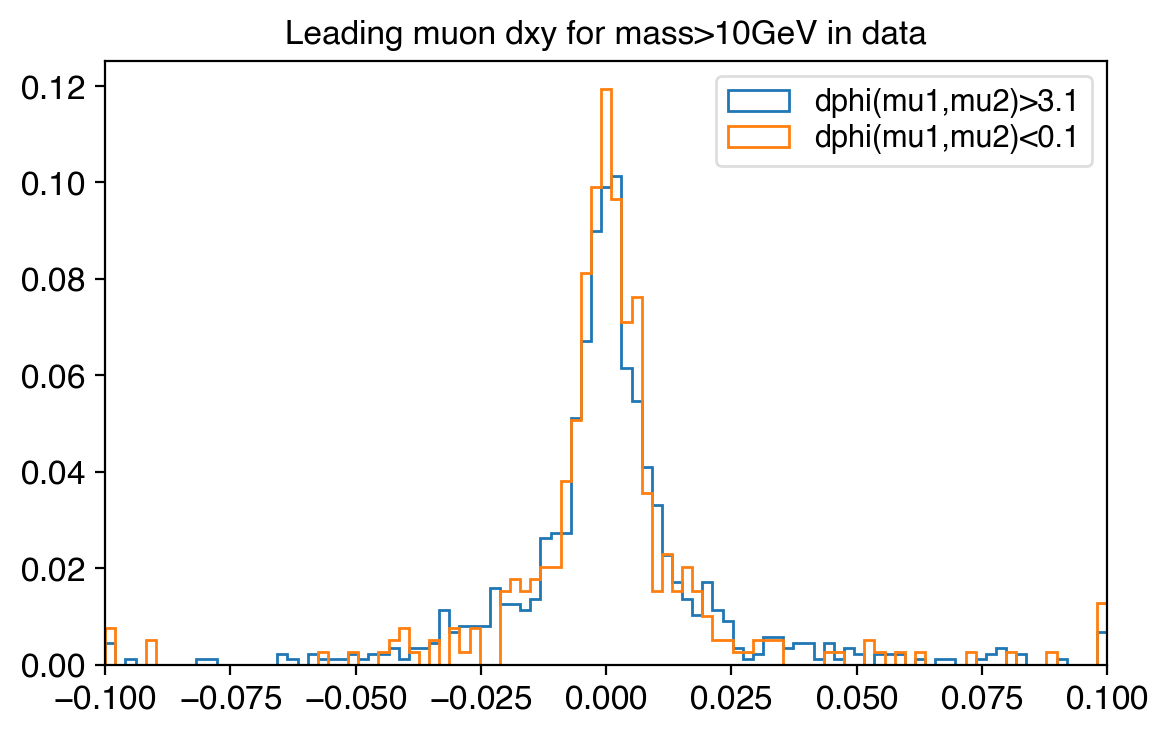

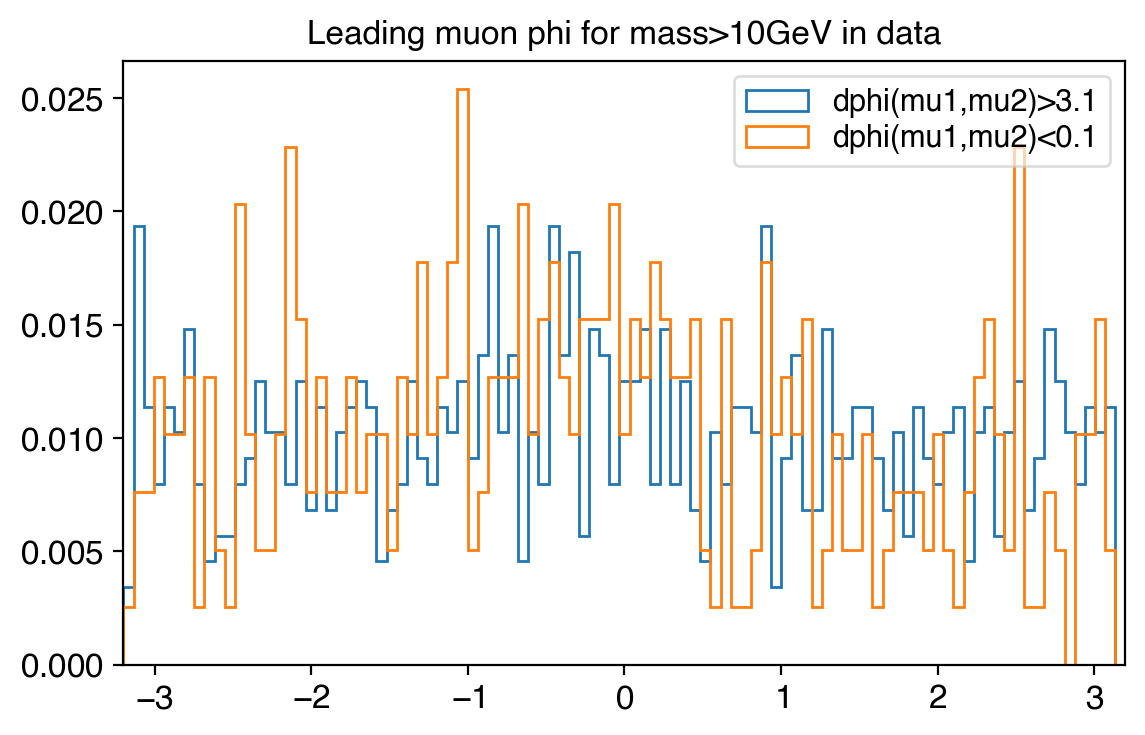

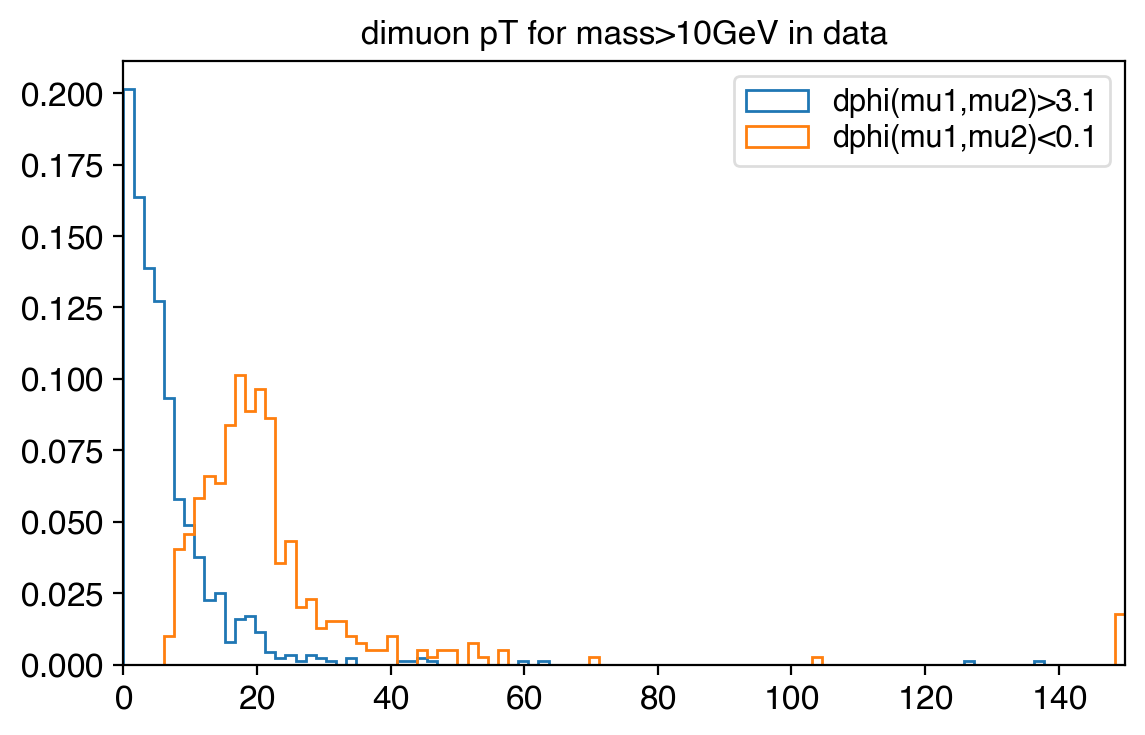

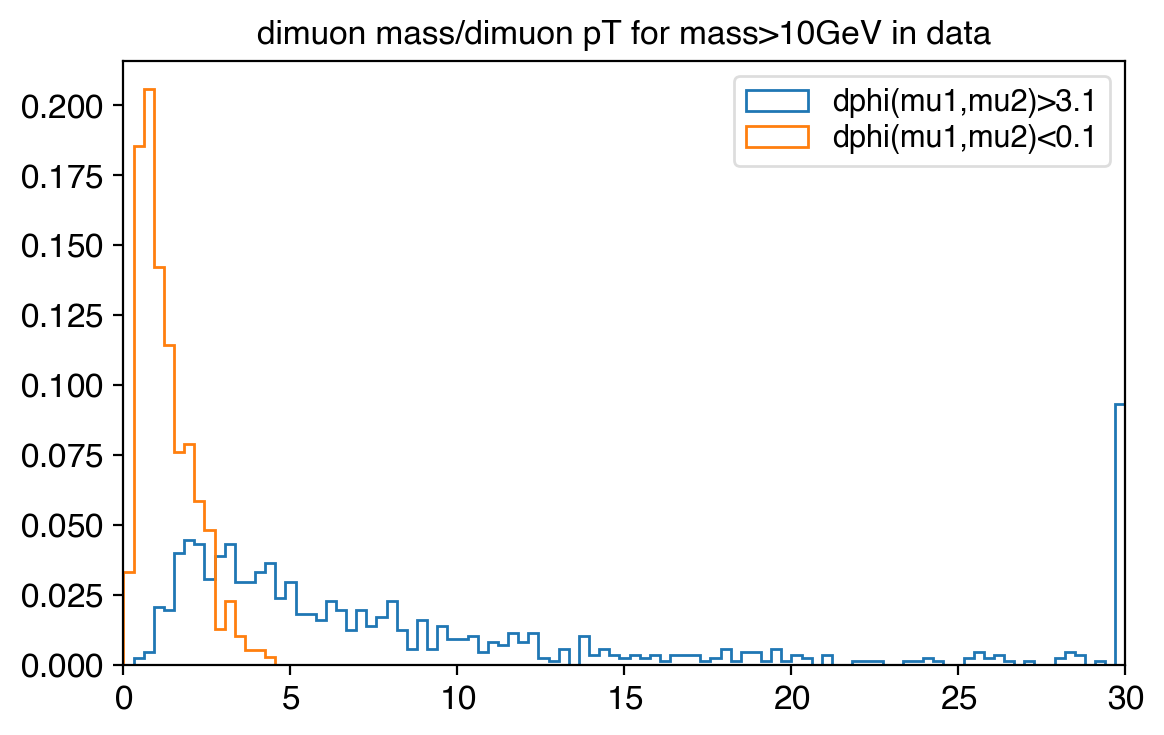

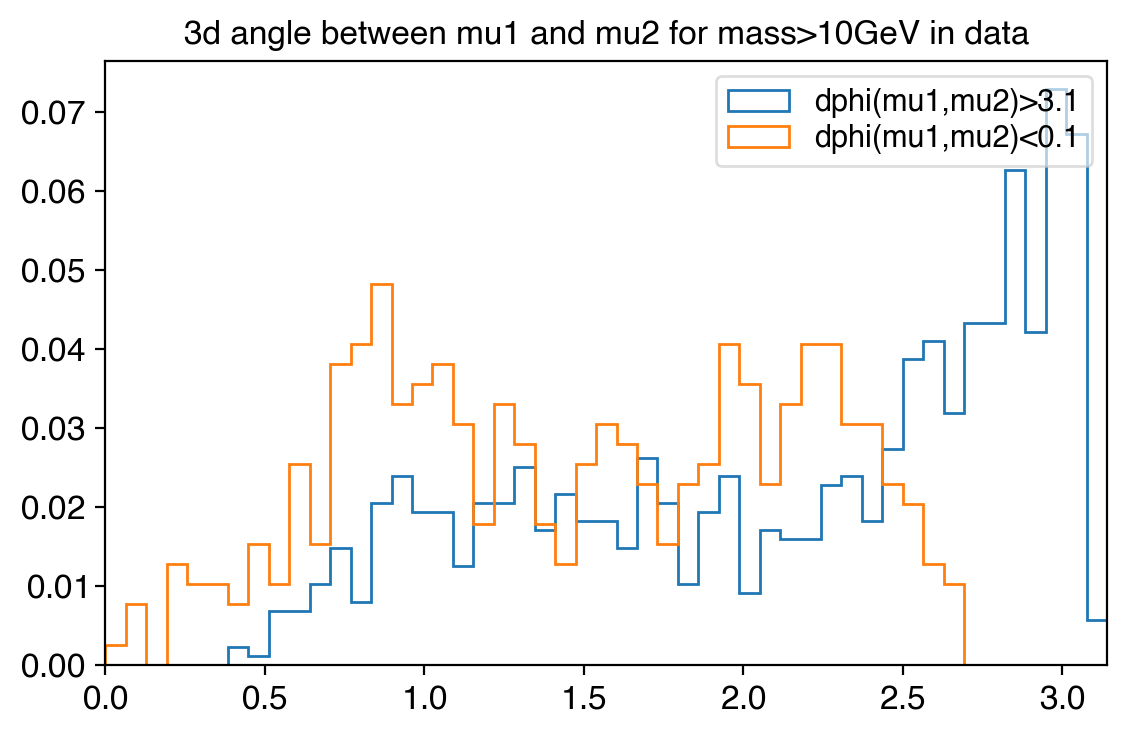

In [5]:
# Hist1D(df_data.query("absdphimumu > 3.1")["absdphimumu"],bins=np.linspace(0,np.pi,100)).plot()
# !mkdir -p plots_misc_v2

fig, ax = plt.subplots()
Hist1D(df_data.query("(dimuon_mass>10) and (absdphimumu > 3.1)")["Muon1_dxyCorr"],bins=np.linspace(-0.1,0.1,100)).normalize().plot(histtype="step",label="dphi(mu1,mu2)>3.1")
Hist1D(df_data.query("(dimuon_mass>10) and (absdphimumu < 0.1)")["Muon1_dxyCorr"],bins=np.linspace(-0.1,0.1,100)).normalize().plot(histtype="step",label="dphi(mu1,mu2)<0.1")
ax.legend()
ax.set_title("Leading muon dxy for mass>10GeV in data")
# fig.savefig("plots_misc_v2/leadingmuondxy_splitphi_mass10.png")

fig, ax = plt.subplots()
Hist1D(df_data.query("(dimuon_mass>10) and (absdphimumu > 3.1)")["Muon1_phi"],bins=np.linspace(-3.2,3.2,100)).normalize().plot(histtype="step",label="dphi(mu1,mu2)>3.1")
Hist1D(df_data.query("(dimuon_mass>10) and (absdphimumu < 0.1)")["Muon1_phi"],bins=np.linspace(-3.2,3.2,100)).normalize().plot(histtype="step",label="dphi(mu1,mu2)<0.1")
ax.legend()
ax.set_title("Leading muon phi for mass>10GeV in data")
# fig.savefig("plots_misc_v2/leadingphi_splitphi_mass10.png")

fig, ax = plt.subplots()
df1 = df_data.query("(dimuon_mass>10) and (absdphimumu > 3.1)")
df2 = df_data.query("(dimuon_mass>10) and (absdphimumu < 0.1)")
Hist1D(df1["dimuon_pt"],bins=np.linspace(0,150.,100)).normalize().plot(histtype="step",label="dphi(mu1,mu2)>3.1")
Hist1D(df2["dimuon_pt"],bins=np.linspace(0,150.,100)).normalize().plot(histtype="step",label="dphi(mu1,mu2)<0.1")
ax.legend()
ax.set_title("dimuon pT for mass>10GeV in data")
# fig.savefig("plots_misc_v2/pt_splitphi_mass10.png")

fig, ax = plt.subplots()
df1 = df_data.query("(dimuon_mass>10) and (absdphimumu > 3.1)")
df2 = df_data.query("(dimuon_mass>10) and (absdphimumu < 0.1)")
Hist1D(df1["dimuon_mass"]/df1["dimuon_pt"],bins=np.linspace(0,30.,100)).normalize().plot(histtype="step",label="dphi(mu1,mu2)>3.1")
Hist1D(df2["dimuon_mass"]/df2["dimuon_pt"],bins=np.linspace(0,30.,100)).normalize().plot(histtype="step",label="dphi(mu1,mu2)<0.1")
ax.legend()
ax.set_title("dimuon mass/dimuon pT for mass>10GeV in data")
# fig.savefig("plots_misc_v2/massoverpt_splitphi_mass10.png")

fig, ax = plt.subplots()
df1 = df_data.query("(dimuon_mass>10) and (absdphimumu > 3.1)")
df2 = df_data.query("(dimuon_mass>10) and (absdphimumu < 0.1)")
Hist1D(df1["angle3dmumu"],bins=np.linspace(0,3.142,50)).normalize().plot(histtype="step",label="dphi(mu1,mu2)>3.1")
Hist1D(df2["angle3dmumu"],bins=np.linspace(0,3.142,50)).normalize().plot(histtype="step",label="dphi(mu1,mu2)<0.1")
ax.legend()
ax.set_title("3d angle between mu1 and mu2 for mass>10GeV in data")
# fig.savefig("plots_misc_v2/angle3dmumu_splitphi_mass10.png")

# !niceplots plots_misc_v2

# Hist1D(df_data.query("absdphimumu > 3.1")["Muon2_dxyCorr"],bins=np.linspace(0,0.1,100)).plot()
# Hist1D(df_data.query("absdphimumu < 0.1")["Muon1_dxyCorr"],bins=np.linspace(0,0.1,100)).plot()

# Hist1D(df_data.query("absdphimumu > 3.1")["Muon1_phi"],bins=np.linspace(-3.142,3.142,50)).normalize().plot()
# Hist1D(df_data.query("absdphimumu < 0.1")["Muon1_phi"],bins=np.linspace(-3.142,3.142,50)).normalize().plot()
# Hist1D(df_data.query("absdphimumu > 3.1")["Muon1_eta"],bins=np.linspace(-3.142,3.142,50)).normalize().plot()
# Hist1D(df_data.query("absdphimumu < 0.1")["Muon1_eta"],bins=np.linspace(-3.142,3.142,50)).normalize().plot()

In [6]:
tofind = df_data.query("(dimuon_mass>10) and (absdphimumu > 3.1) and (angle3dmumu<2.5)")[["run","luminosityBlock","event"]]
tofind

,run,luminosityBlock,event
491,319337,58,27048882
584,319337,60,29549566
594,319337,60,29628184
1350,319337,75,53599601
1372,319337,76,55999325
...,...,...,...
323584,319678,233,336804238
323591,319678,233,336980719
323855,319678,235,339983737
324281,319678,239,347186406


In [13]:
# /hadoop/cms/store/group/snt/run2_data2018/DoubleMuon_Run2018C-17Sep2018-v1_MINIAOD_CMS4_V10-02-04/
fnames = glob.glob(
    "/hadoop/cms/store/group/snt/run2_data2018/*_Run2018C-17Sep2018-v1_MINIAOD_CMS4_V10-02-04/*.root"
)
len(fnames)

1543

In [14]:
# uproot.open(fnames[0])["Events"].keys()

In [16]:
def findevents(fname):
    rle = []
    try:
        t = uproot.open(fname)["Events"]
        run, lumi, event = t.arrays([
            "uint_eventMaker_evtrun_CMS3.obj",
            "uint_eventMaker_evtlumiBlock_CMS3.obj",
            "ull_eventMaker_evtevent_CMS3.obj"],outputtype=tuple)
        good = tofind["run"].isin(run) & tofind["luminosityBlock"].isin(lumi) & tofind["event"].isin(event)
        rle = tofind[good].values.tolist()
    except:
        pass
    return dict(fname=fname,rle=rle)
findevents(fnames[0])#.compute()

{'fname': '/hadoop/cms/store/group/snt/run2_data2018/DoubleMuon_Run2018C-17Sep2018-v1_MINIAOD_CMS4_V10-02-04/merged_ntuple_1.root',
 'rle': []}

In [17]:
results = client.gather(client.map(findevents, fnames))

In [35]:
df = pd.DataFrame(results)
df = df[~df["rle"].apply(lambda x:x==[])]
df

,fname,rle
7,/hadoop/cms/store/group/snt/run2_data2018/Doub...,"[[319579, 2949, 4477882840], [319579, 2966, 44..."
23,/hadoop/cms/store/group/snt/run2_data2018/Doub...,"[[319658, 10, 11077326]]"
47,/hadoop/cms/store/group/snt/run2_data2018/Doub...,"[[319639, 43, 26868730]]"
54,/hadoop/cms/store/group/snt/run2_data2018/Doub...,"[[319639, 58, 52358492], [319657, 99, 15850818..."
61,/hadoop/cms/store/group/snt/run2_data2018/Doub...,"[[319625, 128, 189695678]]"
71,/hadoop/cms/store/group/snt/run2_data2018/Doub...,"[[319678, 94, 103870297]]"
79,/hadoop/cms/store/group/snt/run2_data2018/Doub...,"[[319337, 83, 66054878]]"
88,/hadoop/cms/store/group/snt/run2_data2018/Doub...,"[[319678, 200, 277386651]]"
761,/hadoop/cms/store/group/snt/run2_data2018/JetH...,"[[319678, 200, 277386651]]"
789,/hadoop/cms/store/group/snt/run2_data2018/JetH...,"[[319678, 191, 260341156]]"


In [47]:
s = set(map(tuple,df["rle"].sum()))
print(len(s))
s

21


{(319337, 83, 66054878),
 (319579, 2753, 4230862654),
 (319579, 2949, 4477882840),
 (319579, 2966, 4498879410),
 (319579, 3111, 4671702017),
 (319625, 53, 67617755),
 (319625, 128, 189695678),
 (319625, 140, 207771621),
 (319639, 43, 26868730),
 (319639, 58, 52358492),
 (319639, 559, 866697785),
 (319656, 94, 53513636),
 (319656, 233, 281825087),
 (319657, 4, 5844929),
 (319657, 99, 158508186),
 (319657, 124, 201301521),
 (319658, 10, 11077326),
 (319678, 94, 103870297),
 (319678, 191, 260341156),
 (319678, 200, 277386651),
 (319678, 231, 332951183)}